# The dataset for the covid has been taken from the "Our Wolrd in Data"

[Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data)

In [98]:
#importing the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error

plt.style.use('seaborn')

In [3]:
#Read the dataset
dataset = pd.read_csv("owid-covid-data.csv", low_memory = False, parse_dates=['date'])

In [4]:
#view top 5 elemets from the data
print(dataset.head())

  iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan 2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan 2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan 2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan 2020-01-04          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN         

In [5]:
#Get the information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49437 entries, 0 to 49436
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         49151 non-null  object        
 1   continent                        48865 non-null  object        
 2   location                         49437 non-null  object        
 3   date                             49437 non-null  datetime64[ns]
 4   total_cases                      48822 non-null  float64       
 5   new_cases                        48600 non-null  float64       
 6   new_cases_smoothed               47818 non-null  float64       
 7   total_deaths                     48822 non-null  float64       
 8   new_deaths                       48600 non-null  float64       
 9   new_deaths_smoothed              47818 non-null  float64       
 10  total_cases_per_million          48536 non-null  float64  

##### Since the number of values in each columns are different this suggest that, some values are missing.

In [6]:
#Check the number of element and columns in dataset
print(dataset.shape)

(49437, 41)


##### Taking the values from this with the above output, we can figure out which columns have missing values.

#### Display columns with missing values

In [8]:
print(dataset.isna().any())

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                         True
new_cases                           True
new_cases_smoothed                  True
total_deaths                        True
new_deaths                          True
new_deaths_smoothed                 True
total_cases_per_million             True
new_cases_per_million               True
new_cases_smoothed_per_million      True
total_deaths_per_million            True
new_deaths_per_million              True
new_deaths_smoothed_per_million     True
new_tests                           True
total_tests                         True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_per_case                      True
positive_rate                       True
tests_units     

##### Seems like only two column has no missing values at all

#### Since the continents also has missing values, we will separate the missing values of continent columns

In [9]:
dataset_continent = dataset[~dataset['continent'].isna()]
print("Data set with continents")
print(dataset_continent.iloc[:5, :5])
print(dataset_continent.shape)

dataset_null_continent = dataset[dataset['continent'].isna()]
print("\nData set with null continent values")
print(dataset_null_continent.iloc[:5, :5])
print(dataset_null_continent.shape)

Data set with continents
  iso_code continent     location       date  total_cases
0      AFG      Asia  Afghanistan 2019-12-31          0.0
1      AFG      Asia  Afghanistan 2020-01-01          0.0
2      AFG      Asia  Afghanistan 2020-01-02          0.0
3      AFG      Asia  Afghanistan 2020-01-03          0.0
4      AFG      Asia  Afghanistan 2020-01-04          0.0
(48865, 41)

Data set with null continent values
       iso_code continent location       date  total_cases
48865  OWID_WRL       NaN    World 2019-12-31         27.0
48866  OWID_WRL       NaN    World 2020-01-01         27.0
48867  OWID_WRL       NaN    World 2020-01-02         27.0
48868  OWID_WRL       NaN    World 2020-01-03         44.0
48869  OWID_WRL       NaN    World 2020-01-04         44.0
(572, 41)


#### We will only deal with the countires whose contients are provided, since the location is generic for the non continent values

### Top 10 countires with highest coronavirus cases

          location  new_cases
199  United States  7718947.0
90           India  7053806.0
27          Brazil  5082637.0
157         Russia  1285084.0
42        Colombia   902747.0
7        Argentina   883883.0
177          Spain   861112.0
150           Peru   846088.0
125         Mexico   814328.0
68          France   718873.0


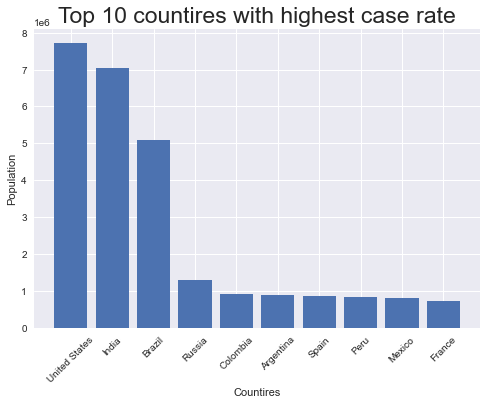

In [13]:
top10_case_cntry = dataset_continent.groupby('location')['new_cases'].sum().reset_index().sort_values('new_cases', ascending = False)[:10]
print(top10_case_cntry)

plt.figure()
plt.bar(top10_case_cntry['location'], top10_case_cntry['new_cases'])
plt.title("Top 10 countires with highest case rate", fontsize =23)
plt.xticks(rotation = 45)
plt.xlabel("Countires")
plt.ylabel("Population")
plt.show()

##### USA has the highest corona virus cases compared to other countires. So does that mean it has highest death rate.

### Top 10 countries with highest deaths

           location  new_deaths
199   United States    214377.0
27           Brazil    150198.0
90            India    108334.0
125          Mexico     83642.0
198  United Kingdom     42760.0
97            Italy     36140.0
150            Peru     33223.0
177           Spain     32929.0
68           France     32684.0
92             Iran     28293.0


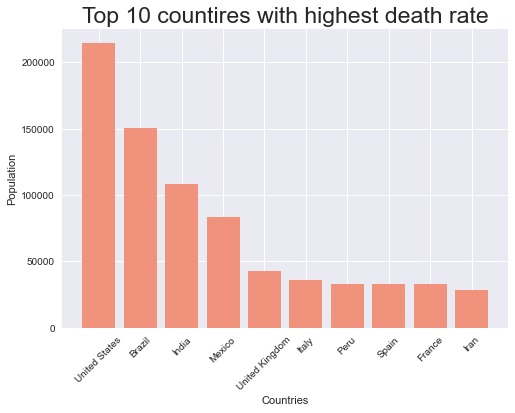

In [15]:
top10_deaths_cntry = dataset_continent.groupby('location')['new_deaths'].sum().reset_index().sort_values('new_deaths', ascending = False)[:10]
print(top10_deaths_cntry)

plt.figure()
plt.bar(top10_deaths_cntry['location'], top10_deaths_cntry['new_deaths'], color= '#F1937C')
plt.title("Top 10 countires with highest death rate", fontsize= 23)
plt.xlabel("Countries")
plt.ylabel("Population")
plt.xticks(rotation = 45)
plt.show()

#### This shows that the case is true for USA where high cases has also resulted to high deaths.

### Looking at the data for top 10 country with highest deaths

         location  new_deaths  new_cases
0   United States    214377.0  7718947.0
1          Brazil    150198.0  5082637.0
2           India    108334.0  7053806.0
3          Mexico     83642.0   814328.0
4  United Kingdom     42760.0   590844.0
5           Italy     36140.0   349494.0
6            Peru     33223.0   846088.0
7           Spain     32929.0   861112.0
8          France     32684.0   718873.0
9            Iran     28293.0   496253.0


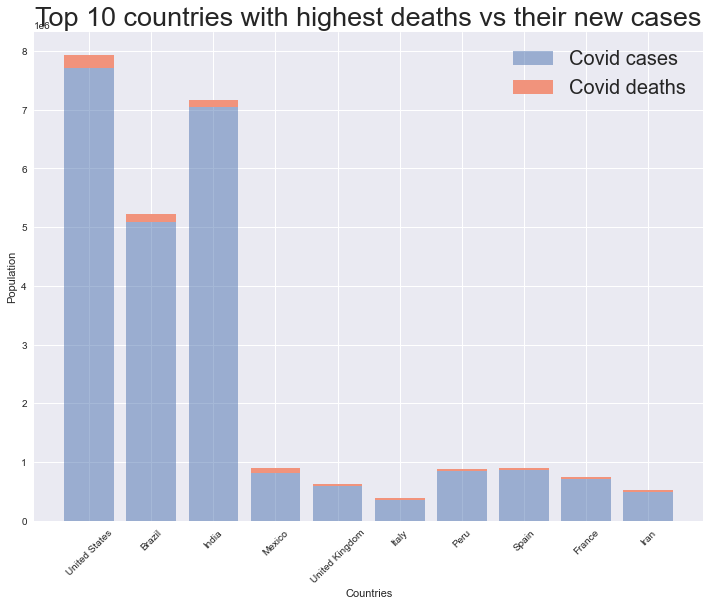

In [18]:
top10_death_cases = dataset_continent[dataset_continent['location'].isin(list(top10_deaths_cntry['location']))].groupby('location')['new_cases'].sum()
top10_deaths_cases_cntry = pd.merge(top10_deaths_cntry, top10_death_cases, left_on = top10_deaths_cntry['location'], right_on = top10_death_cases.index)
print(top10_deaths_cases_cntry.iloc[:, [1, 2, 3]])

plt.figure(figsize = (12, 9))
plt.bar(top10_deaths_cases_cntry['location'], top10_deaths_cases_cntry['new_cases'], alpha = 0.5, label="Covid cases")
plt.bar(top10_deaths_cases_cntry['location'], top10_deaths_cases_cntry['new_deaths'], bottom=top10_deaths_cases_cntry['new_cases'], label = "Covid deaths", color = '#F1937C')
plt.legend(fontsize = 20)
plt.xticks(rotation = 45)
plt.title("Top 10 countries with highest deaths vs their new cases", fontsize = 27)
plt.xlabel("Countries")
plt.ylabel("Population")
plt.show()

#### Another informaton that we can see is that countires like USA, Brazil and India are in top 3 position for highest death rates and cases. So what might be the reason for that?

## Visualizing the cases around the world

<AxesSubplot:>

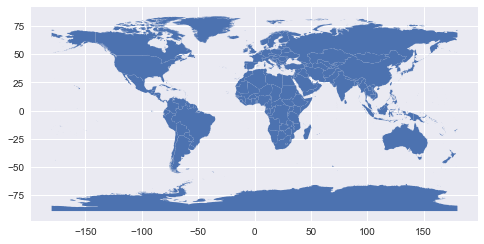

In [23]:
#Read the file containg the geopgraphical information
data_map = gpd.read_file('map/World_Countries__Generalized_.shp')
data_map.rename(columns = {'COUNTRYAFF' : 'location'}, inplace = True)
data_map.plot()

# The file for the map was taken from the ArcGis Hub
[World with Boundaries](https://hub.arcgis.com/datasets/UIA::uia-world-countries-boundaries/data?geometry=-120.234%2C-84.708%2C120.234%2C57.127)

In [32]:
#merging the datamap and our data from dataset
cases_popln = dataset_continent.groupby('location')[['new_deaths', 'new_cases', 'population']].agg({'new_deaths': 'sum', 'new_cases':'sum', 'population': lambda x:x.unique()})
cases_popln['new_cases'] = cases_popln['new_cases'].fillna(0)
cases_popln = cases_popln.dropna(axis = 0)

data_map['location'].replace('Russian Federation','Russia', inplace = True)
# print(data_map[data_map['location'] == 'Congo DRC'])
merged = pd.merge(data_map, cases_popln, on='location')

#### Corona cases around the world


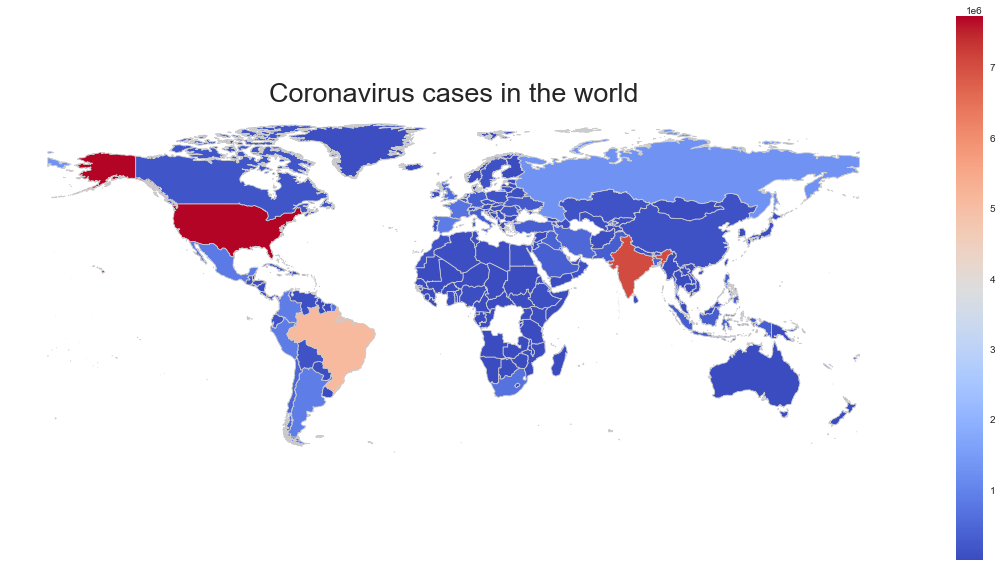

In [35]:
fig, ax = plt.subplots(1, figsize = (20, 10))
ax.axis('off')
ax.set_title("Coronavirus cases in the world", fontsize = 27)
merged.plot(column = 'new_cases', cmap='coolwarm', linewidth=0.8,\
           ax = ax, edgecolor = '0.8',\
           legend = True)
plt.show()

#### Deaths around the world

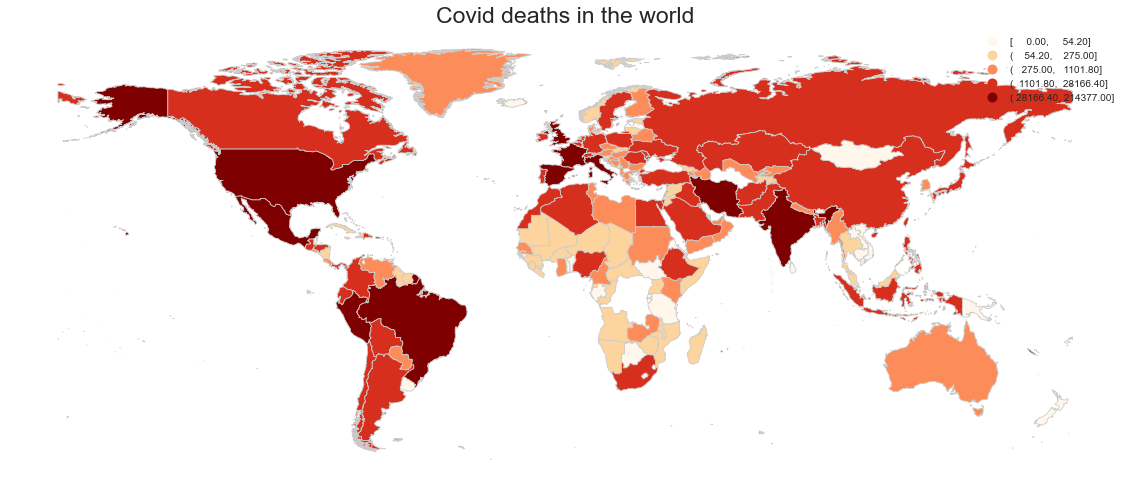

In [36]:
fig, ax = plt.subplots(1, figsize = (20,10))
ax.axis('off')
ax.set_title('Covid deaths in the world', fontsize = 23)

merged.plot(column = 'new_deaths', cmap='OrRd', \
            scheme='quantiles', linewidth = 0.8, ax= ax, edgecolor ='0.8',\
           legend = True)
plt.show()

#### Population around the world

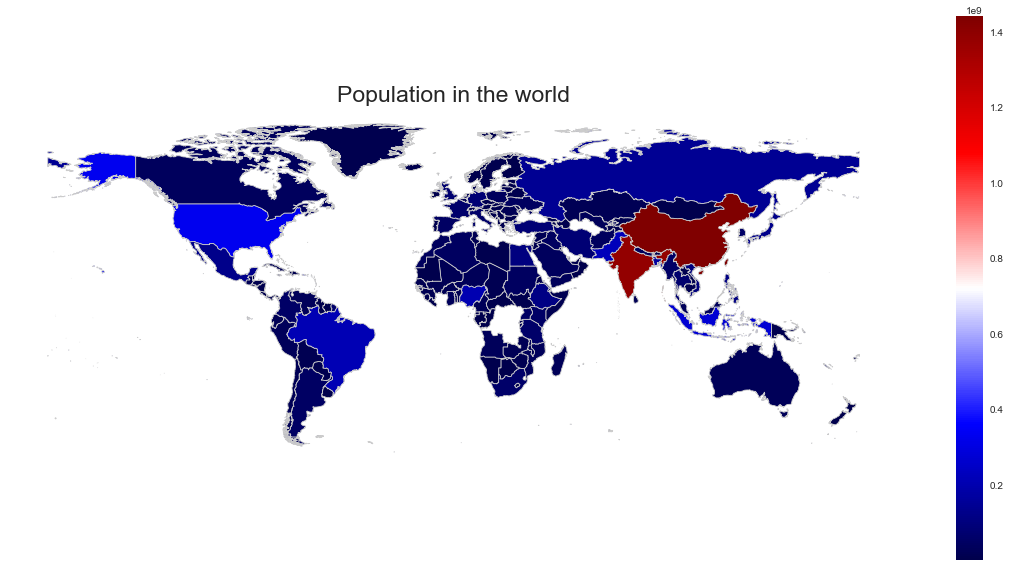

In [37]:
fig, ax = plt.subplots(1, figsize = (20,10))
ax.axis('off')
ax.set_title('Population in the world', fontsize = 23)

merged.plot(column = 'population', cmap='seismic',\
           linewidth = 0.8, ax= ax, edgecolor ='0.8',\
           legend = True)
plt.show()

## What are the factors that promote for the increase in the covid cases and the covid deaths ?

### Relation between covid cases and population deinsity

In [38]:
cases_density = dataset_continent.groupby('location')[['new_cases','population_density']].agg({'new_cases': 'sum', 'population_density': lambda x:x.unique()})

#check is nan values are present
print("Are there any NaN value, if yes then we will remove them")
print(cases_density.isna().any())

#If cases has null value add 0
if cases_density['new_cases'].isna().any():
    cases_density['new_cases'] = cases_density['new_cases'].fillna(0)

#If populationd density has null value remove it
if cases_density['population_density'].isna().any():
    cases_density = cases_density[~cases_density['population_density'].isna()]
    
print(cases_density.head())

Are there any NaN value, if yes then we will remove them
new_cases             False
population_density     True
dtype: bool
             new_cases  population_density
location                                  
Afghanistan    39703.0              54.422
Albania        15231.0             104.871
Algeria        52940.0              17.348
Andorra         2696.0             163.755
Angola          6031.0              23.890


In [39]:
#Check the data types
print(cases_density.info())

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, Afghanistan to Zimbabwe
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_cases           199 non-null    float64
 1   population_density  199 non-null    float64
dtypes: float64(2)
memory usage: 4.7+ KB
None


In [40]:
#Sorting the data based on descending order of populaton density
cases_density_sort = cases_density.sort_values('population_density', ascending = False).reset_index()
print(cases_density_sort.head(10))

                    location  new_cases  population_density
0                     Monaco      233.0           19347.500
1                  Singapore    57866.0            7915.731
2                  Hong Kong        0.0            7039.714
3                  Gibraltar      476.0            3457.100
4                    Bahrain    75287.0            1935.907
5                   Maldives    10859.0            1454.433
6                      Malta     3681.0            1454.037
7                    Bermuda      184.0            1308.820
8                 Bangladesh   377073.0            1265.036
9  Sint Maarten (Dutch part)      707.0            1209.088


In [43]:
# Calculate the correlation between the density and cases
print(cases_density.corr())

                    new_cases  population_density
new_cases            1.000000           -0.026714
population_density  -0.026714            1.000000


##### - Since the correlation cofficient is nearly equal to 0, its show little negative correlation to none at all.

In [44]:
#Normalizing the data
cases_density_sort[['new_cases','population_density']] = (cases_density_sort[['new_cases','population_density']] - cases_density_sort[['new_cases','population_density']].min()) /(cases_density_sort[['new_cases','population_density']].max() - cases_density_sort[['new_cases','population_density']].min())
print(cases_density_sort.head(10))

                    location  new_cases  population_density
0                     Monaco   0.000030            1.000000
1                  Singapore   0.007497            0.409130
2                  Hong Kong   0.000000            0.363852
3                  Gibraltar   0.000062            0.178679
4                    Bahrain   0.009754            0.100053
5                   Maldives   0.001407            0.075168
6                      Malta   0.000477            0.075147
7                    Bermuda   0.000024            0.067641
8                 Bangladesh   0.048850            0.065378
9  Sint Maarten (Dutch part)   0.000092            0.062487


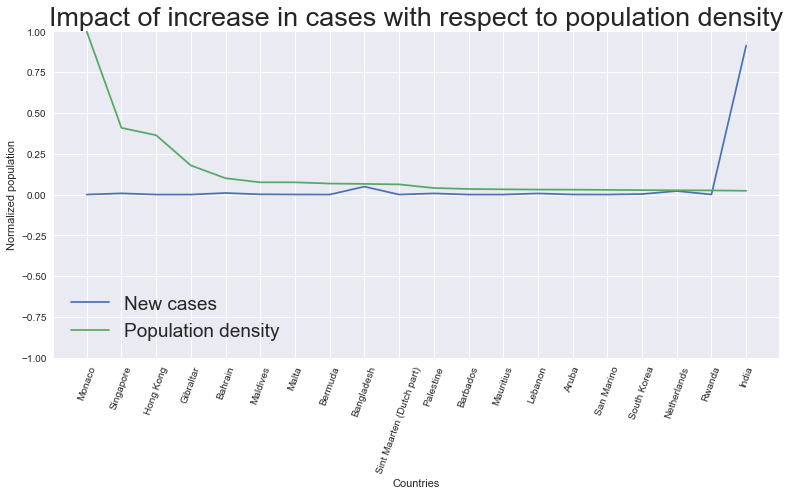

In [49]:
#Graphical representation of above data
plt.figure(figsize = (13, 6))
plt.plot(cases_density_sort['location'][:20], cases_density_sort['new_cases'][:20], label="New cases")
plt.plot(cases_density_sort['location'][:20], cases_density_sort['population_density'][:20], label="Population density")
plt.xticks(rotation = '70')
plt.gca().set_ylim([-1, 1])
plt.xlabel('Countries')
plt.ylabel("Normalized population")
plt.title("Impact of increase in cases with respect to population density", fontsize = 27)
plt.legend(fontsize = 19)
plt.show()

##### So the contries whose population density are high seems to have less covid cases.

### Does having more beds in hospital reduces the deaths?

Are there any Nan value?
location                      False
new_deaths                    False
hospital_beds_per_thousand     True
deaths_per_thousand           False
dtype: bool




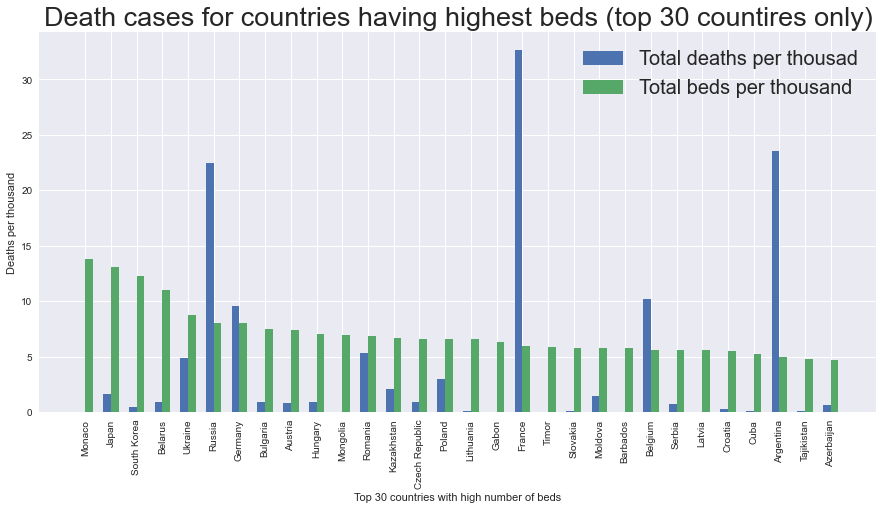

In [57]:
beds_deaths = dataset_continent.groupby('location')[['new_deaths', 'hospital_beds_per_thousand']].agg({'new_deaths':'sum', 'hospital_beds_per_thousand': lambda x :x.unique()})
beds_deaths['deaths_per_thousand'] =beds_deaths['new_deaths'] /1000

#Sorting the data accorind to the highest beds rate
beds_deaths = beds_deaths.sort_values('hospital_beds_per_thousand', ascending = False).reset_index()

print("Are there any Nan value?")
print(beds_deaths.isna().any())

#removing the rows with nan
beds_deaths = beds_deaths.dropna(axis = 0)

print("\n")
#plot
width = 0.3
n = np.arange(30)
plt.figure(figsize= (15, 7))
plt.bar(n, beds_deaths['deaths_per_thousand'][:30], width, align = 'center', label="Total deaths per thousad")
plt.bar(n + width, beds_deaths['hospital_beds_per_thousand'][:30], width, align ='center', label="Total beds per thousand")
plt.legend(fontsize= 20)
plt.xticks(n+width/2, beds_deaths['location'][:30], rotation = 90)
plt.title("Death cases for countries having highest beds (top 30 countires only)", fontsize = 27)
plt.xlabel("Top 30 countries with high number of beds")
plt.ylabel("Deaths per thousand")
plt.show()

##### This shows that contries that have large amount of beds, have a less amount of death rate which may be due to the availabilty of beds when needed, But there seems to be some outliers which are possibly due to the ignorance of government action.

### It is believed that the old aged people are more prone to the Covid-19. Let's check this fact.

In [58]:
print(dataset_continent.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


##### Since we have columns containing containg the data for age 65 older and then age 70 older, we can only take the value for age 65 older only as 75 are already included in it.

Does a column has NaN values?
new_deaths       False
aged_65_older     True
population       False
dtype: bool

 Top 10 country that consist of highest percentage of old age people 
   location  aged_65_older
0     Japan         27.049
1     Italy         23.021
2  Portugal         21.502
3   Germany         21.453
4   Finland         21.228
5  Bulgaria         20.801
6    Greece         20.396
7    Sweden         19.985
8    Latvia         19.754
9   Croatia         19.724


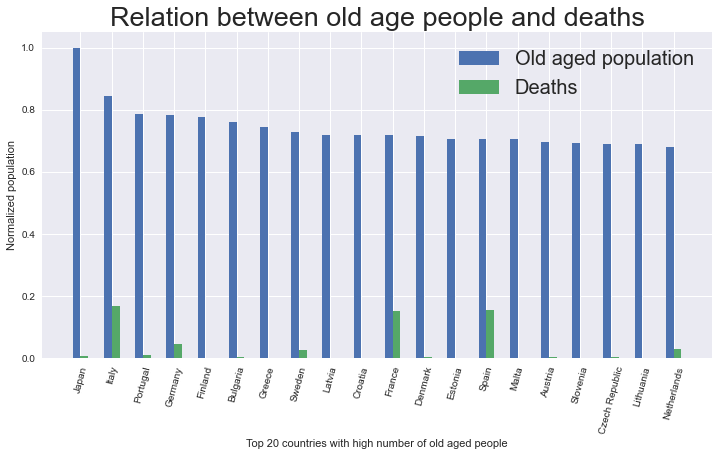

In [59]:
deaths_old = dataset_continent.groupby('location')[['new_deaths', 'aged_65_older', 'population']].agg({'new_deaths': 'sum', 'aged_65_older' : lambda x: x.unique(), 'population' : lambda x:x.unique()})

#Chech if any columns has null values
print("Does a column has NaN values?")
print(deaths_old.isna().any())

#Removing the columns with null values
deaths_old = deaths_old.dropna(axis = 0)

#Sorting the data based on age
deaths_old = deaths_old.sort_values('aged_65_older', ascending = False).reset_index()

print("\n Top 10 country that consist of highest percentage of old age people ")
print(deaths_old[['location', 'aged_65_older']][:10])

#normalization
deaths_old = deaths_old.set_index('location')
deaths_old = (deaths_old - deaths_old.min())/(deaths_old.max() - deaths_old.min())

plt.figure(figsize = (12, 6))
n = np.arange(20)
width =0.25
plt.bar(n, deaths_old['aged_65_older'][:20], width, label="Old aged population")
plt.bar(n+width, deaths_old['new_deaths'][:20], width, label="Deaths")
plt.xticks(n + width/2, deaths_old.index[:20], rotation = 75)
plt.legend(fontsize = 20)
plt.title("Relation between old age people and deaths", fontsize = 27)
plt.xlabel("Top 20 countries with high number of old aged people")
plt.ylabel("Normalized population")
plt.show()

##### This show having high old age pople doesn't always results in high death even they are more prone.

### Does extreme poverty contribute to the death rate from covid?

Top 10 countries with the highest poverty rate 

                       location  extreme_poverty
0                    Madagascar             77.6
1  Democratic Republic of Congo             77.1
2                       Burundi             71.7
3                        Malawi             71.4
4                 Guinea-Bissau             67.1
5                    Mozambique             62.9
6                       Lesotho             59.6
7                        Zambia             57.5
8                        Rwanda             56.0
9                  Sierra Leone             52.2
Normalized data
                              new_deaths  extreme_poverty
location                                                 
Madagascar                      0.001106         1.000000
Democratic Republic of Congo    0.001283         0.993548
Burundi                         0.000005         0.923871
Malawi                          0.000840         0.920000
Guinea-Bissau                   0.000182        

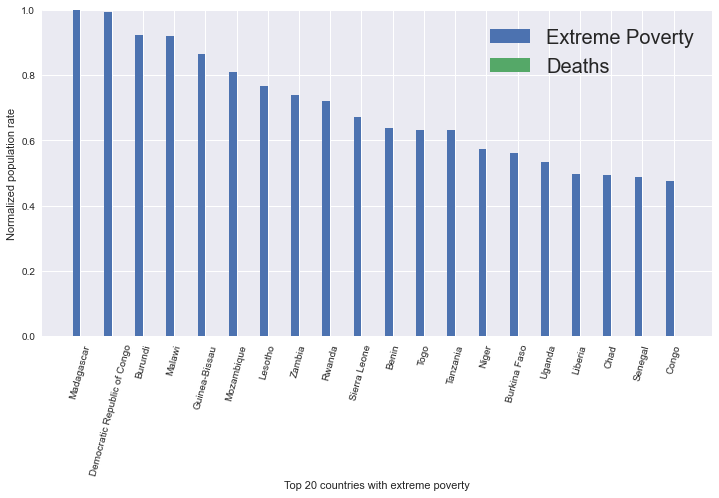

In [63]:
death_poverty = dataset_continent.groupby('location')[['new_deaths', 'extreme_poverty']].agg({'new_deaths': 'sum', 'extreme_poverty' : lambda x:x.unique()})

#drop rows with Nan values
death_poverty = death_poverty.dropna(axis = 0)

#sorting
death_poverty = death_poverty.sort_values('extreme_poverty', ascending = False).reset_index()

print("Top 10 countries with the highest poverty rate \n")
print(death_poverty[['location', 'extreme_poverty']][:10])

death_poverty = death_poverty.set_index('location')

#Normalization
death_poverty = (death_poverty - death_poverty.min())/(death_poverty.max() - death_poverty.min())

print("Normalized data")
print(death_poverty.head(10))

plt.figure(figsize = (12, 6))
n = np.arange(20)
width =0.25
plt.bar(n, death_poverty['extreme_poverty'][:20], width, label="Extreme Poverty")
plt.bar(n+width, death_poverty['new_deaths'][:20], width, label="Deaths")
plt.xticks(n + width/2, death_poverty.index[:20], rotation = 75)
plt.legend(fontsize = 20)
plt.xlabel("Top 20 countries with extreme poverty")
plt.ylabel("Normalized population rate")
plt.ylim([0, 1])
plt.show()

##### The deaths are so low that they are not visible in the graph. 
##### Just having high povert doesn't only indicate that it will contribute to the high death rate

## Researches have been conducted regarding these factors in covid deaths and cases
#### - [The curious case of South Asia’s ‘low’ coronavirus deaths](https://www.aljazeera.com/news/2020/05/18/the-curious-case-of-south-asias-low-coronavirus-deaths/?gb=true)
#### - [Coronavirus: Japan's mysteriously low virus death rate](https://www.bbc.com/news/world-asia-53188847)

### Graphical analysis based on the specified country

In [66]:
columns = ['date', 'new_cases', 'new_deaths', 'location', 'new_tests', 'positive_rate', 'population_density', 'gdp_per_capita',
          'aged_65_older', 'aged_70_older', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']
dataset2 = dataset_continent[columns]

In [118]:
def country_wise_plot(country):
    country_data = dataset2[dataset2['location'] == country]
    
    #Select specific values only
    country_data2 = country_data[['date', 'new_cases', 'new_deaths', 'new_tests', 'positive_rate']].fillna(0)
   
#Cases vs deaths
    plt.figure(figsize =(12, 7))
    plt.plot(country_data2['date'], country_data2['new_cases'], label="New cases")
    plt.plot(country_data2['date'], country_data2['new_deaths'], label="New deaths", color ="#F1937C")
    plt.title('For {} (New cases vs New deaths)'.format(country), fontsize = 25)
    plt.legend()
    plt.xticks(rotation = '45')
    plt.xlabel('Dates')
    plt.ylabel("Number of people")
    plt.show()

#cases with respect to test
    plt.figure(figsize =(12, 7))
    plt.plot(country_data2['date'], country_data2['new_cases'], label="New cases")
    plt.plot(country_data2['date'], country_data2['new_tests'], label="New tests")
    plt.title('For {} (New cases vs New tests)'.format(country), fontsize= 25)
    plt.legend()
    plt.xticks(rotation = '45')
    plt.xlabel('Dates')
    plt.ylabel("Number of people")
    plt.show()

#Covid cases for last 30 days
    plt.figure(figsize =(12, 7))
    plt.bar(country_data2['date'][-30:], country_data2['new_cases'][-30:])
    plt.title('Last 30 days covid cases in {}'.format(country), fontsize= 25)
    plt.xticks(rotation = '45')
    plt.xlabel('Dates')
    plt.xlabel("Number of people with covid")
    plt.show()
    
#Covid deaths for last 30 days
    plt.figure(figsize =(12, 7))
    plt.bar(country_data2['date'][-30:], country_data2['new_deaths'][-30:], color = '#F1937C')
    plt.title('Last 30 days covid deaths in {}'.format(country), fontsize= 25)
    plt.xticks(rotation = '45')
    plt.xlabel('Dates')
    plt.ylabel("Number of people dead from covid")
    plt.show()
    

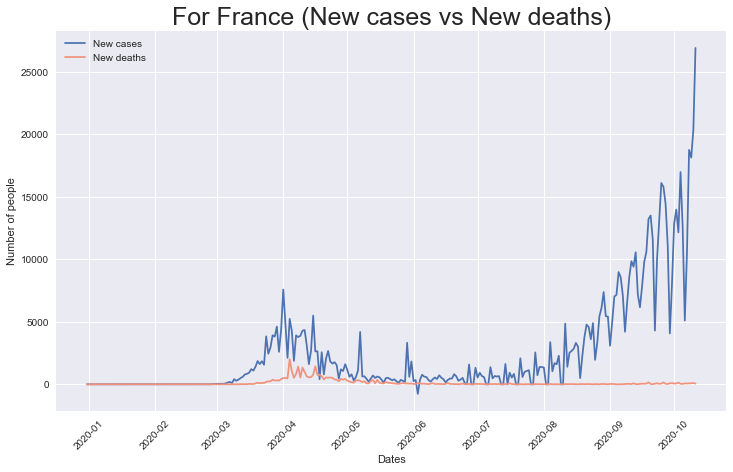

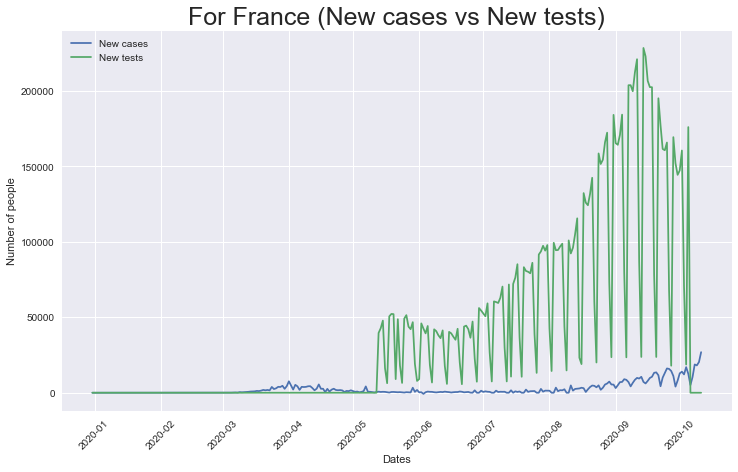

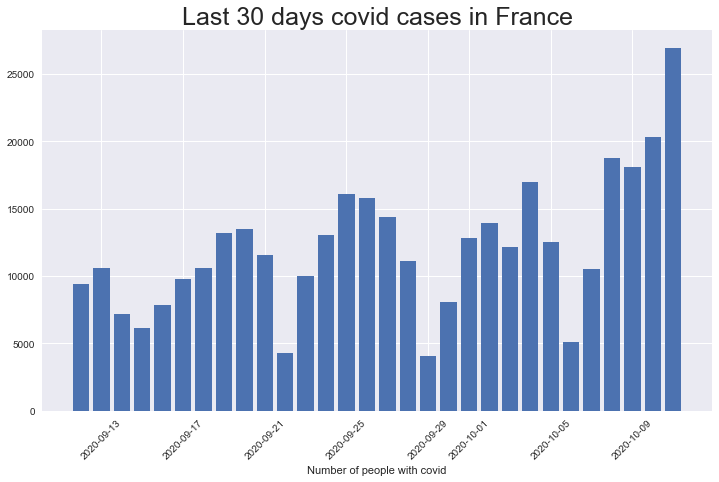

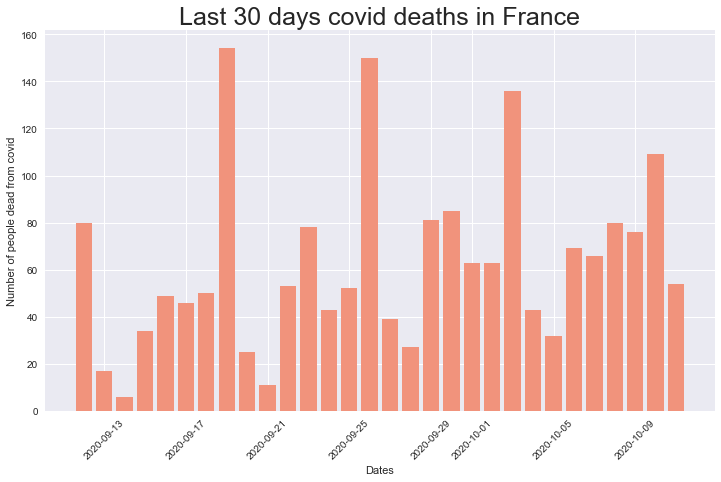

In [124]:
country_wise_plot('France')

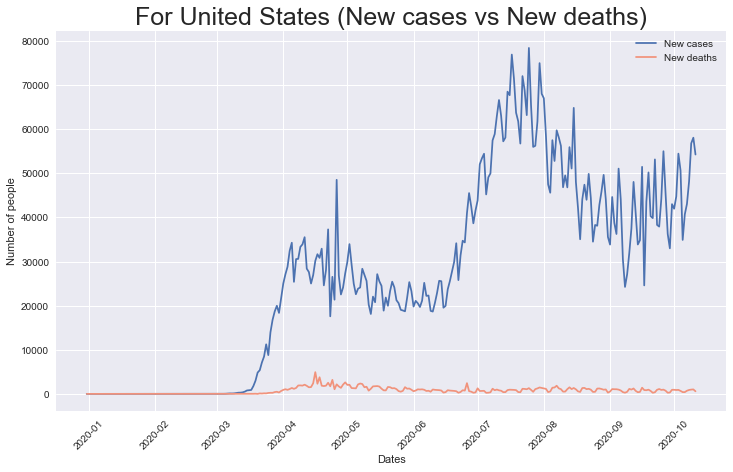

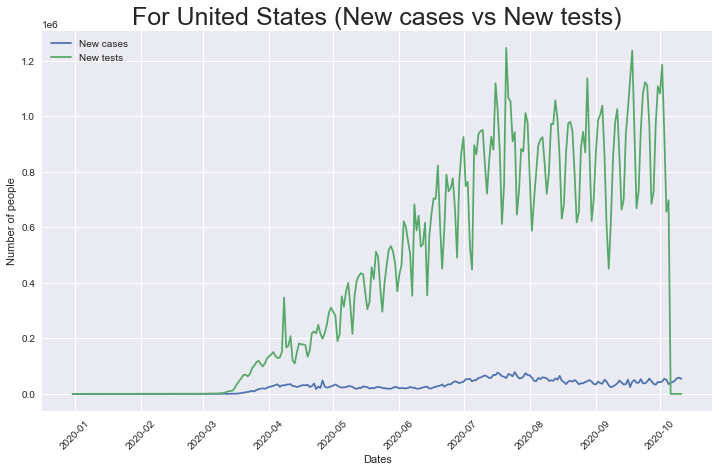

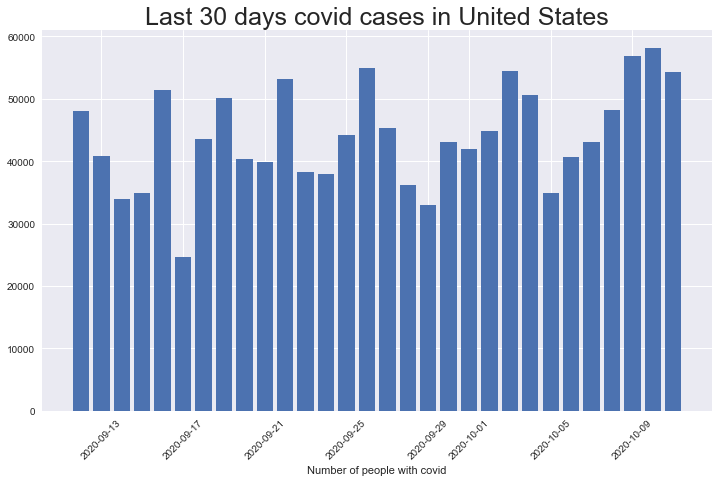

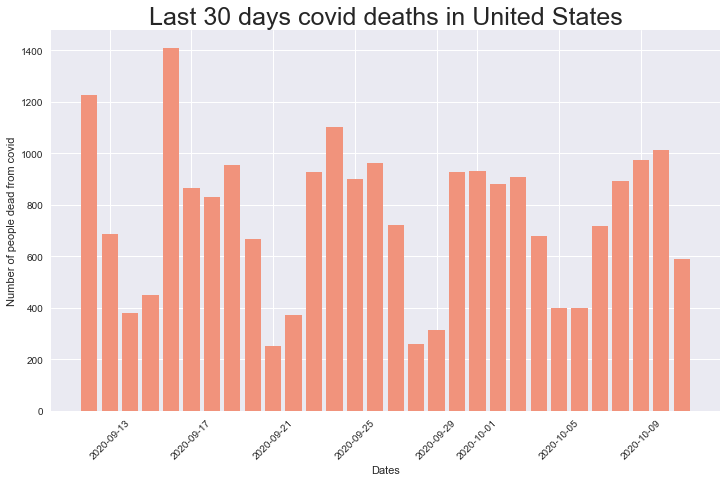

In [123]:
country_wise_plot('United States')

## 

### For the time series data we will be using [fbprophet](https://facebook.github.io/prophet/docs/quick_start.html)

In [127]:
def predict_covid(country):
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    data_country = dataset_continent[dataset_continent['location'] == country][['date', 'new_cases']].reset_index().iloc[:, [1, 2]]
   
    #Change the name of columns
    data_country.columns = ['ds', 'y']
    data_country = data_country.fillna(0)
    
    #Fitting the training data in the model
    model.fit(data_country)
    
    #Create a time period of 14 days after the end of give data
    future = model.make_future_dataframe(periods = 14)
    print("Last 5 dates on which predicition will be made")
    print(future.tail())
    
    forecast = model.predict(future)
    print("\n Predictions: ")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    fig1 = model.plot(forecast )
    
    # calculate MAE between expected and predicted values for december
    y_true = data_country['y'][-14:].values
    y_pred = forecast['yhat'][-14:].values
    mae = mean_absolute_error(y_true, y_pred)
    print('\n MAE: %.3f' % mae)

Last 5 dates on which predicition will be made
            ds
295 2020-10-21
296 2020-10-22
297 2020-10-23
298 2020-10-24
299 2020-10-25

 Predictions: 
            ds         yhat   yhat_lower   yhat_upper
295 2020-10-21  7937.321166  7675.744712  8188.713513
296 2020-10-22  8392.393474  8128.337193  8632.595645
297 2020-10-23  8739.792759  8472.616478  8998.383291
298 2020-10-24  9039.093333  8788.209208  9292.555763
299 2020-10-25  9279.257219  9030.987642  9521.871963

 MAE: 4508.328


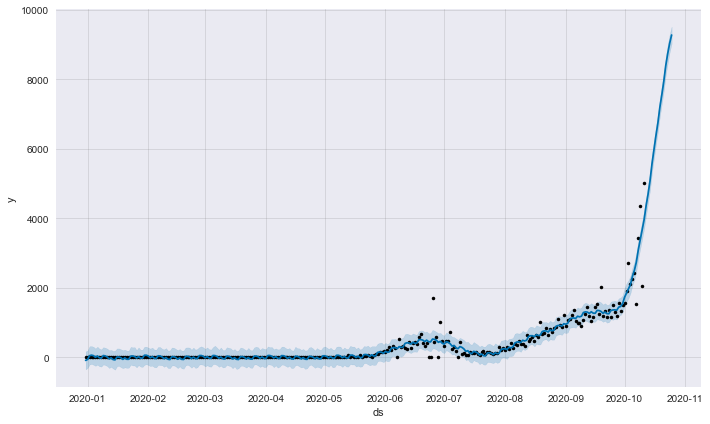

In [128]:
predict_covid('Nepal')

Last 5 dates on which predicition will be made
            ds
295 2020-10-21
296 2020-10-22
297 2020-10-23
298 2020-10-24
299 2020-10-25

 Predictions: 
            ds          yhat    yhat_lower    yhat_upper
295 2020-10-21  66646.295299  61398.560623  71652.912611
296 2020-10-22  68233.759876  63371.329880  73253.360253
297 2020-10-23  71730.428859  66636.461961  76391.520619
298 2020-10-24  75486.087939  70687.009202  80192.414864
299 2020-10-25  74043.199170  69363.583018  79241.309200

 MAE: 17298.521


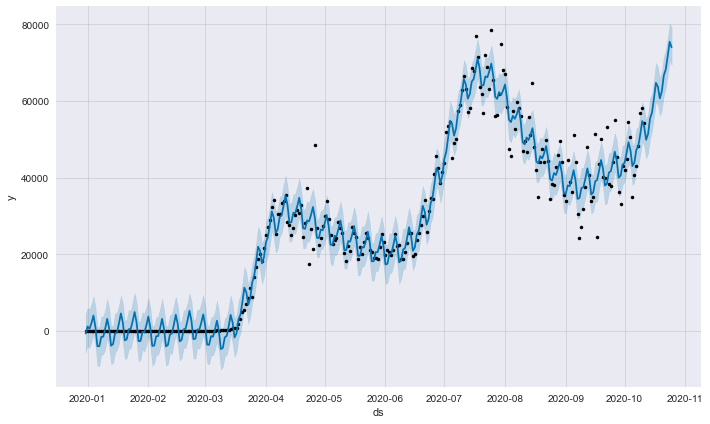

In [129]:
predict_covid('United States')

##### Due to the lack of sufficient data, our model is clearly overfitting